<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch03_LambdaSchichten/blob/main/Kantenerkennung_mit_Tensoren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kanten erkennen mit Tensoren


In [1]:
from keras.layers import Input, Lambda
from keras.models import Model
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

!git clone https://github.com/MaschinenNah/ml_utils
from ml_utils import load
from ml_utils import convert
from ml_utils import show
from ml_utils import frame_predict as fp

# Hier kommen einige unwichtige und störende Warnungen, deshalb:
import warnings
warnings.filterwarnings('ignore')

# Weil Modelle immer Batches verarbeiten, 
# wir uns aber erst einmal einzelne Beispiele anschauen wollen:
def predict_single(model, input):
  input = input[np.newaxis, ...]
  output = model.predict(input)[0]
  return output

Cloning into 'ml_utils'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 121 (delta 56), reused 85 (delta 27), pack-reused 0
Receiving objects: 100% (121/121), 14.38 KiB | 7.19 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [2]:
zip_url = "https://github.com/MaschinenNah/demo_daten/raw/main/farbige_bilder_48_48.zip"
load.load_and_unzip_from_url(zip_url)

In [27]:
path = "/content/data/img_train"
image_paths = load.all_abs_paths_in_dir(path)[:64];
nImages = len(image_paths)

batch_x = np.empty( (nImages, 48, 48), "float32")

for idx, image_path in enumerate(image_paths):
  img = load.img_path_to_np_array(image_path)
  img = convert.rgb_to_grayscale(img)
  batch_x[idx] = img



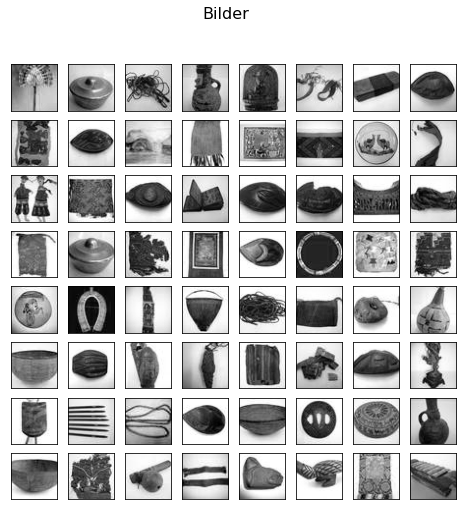

In [28]:
show.show_images_from_np_array(batch_x, "Bilder")

In [43]:
from keras.layers import Conv2D, Reshape

input_shape = (48, 48)
output_shape = (48, 48)

input_layer = Input(shape=input_shape)

x = Reshape((48, 48, 1))(input_layer)

x_kernel = Conv2D(name="x_kernel", filters=1, padding = "same", kernel_size=(3,3), activation="relu")(x)

y_kernel = Conv2D(name="y_kernel", filters=1, kernel_size=(3,3), activation="relu")(x)

x = Reshape((48, 48)) (x_kernel)

output_layer = x

edge_detect = Model(input_layer, output_layer)

x_kernel_weights = np.array([1,0,-1,2,0,-2,1,0,-1])
x_kernel_weights = x_kernel_weights.reshape((3, 3, 1, 1))
x_kernel_weights = [x_kernel_weights, np.array([0])]
edge_detect.get_layer("x_kernel").set_weights(x_kernel_weights)

In [45]:
prediction = edge_detect.predict(batch_x)

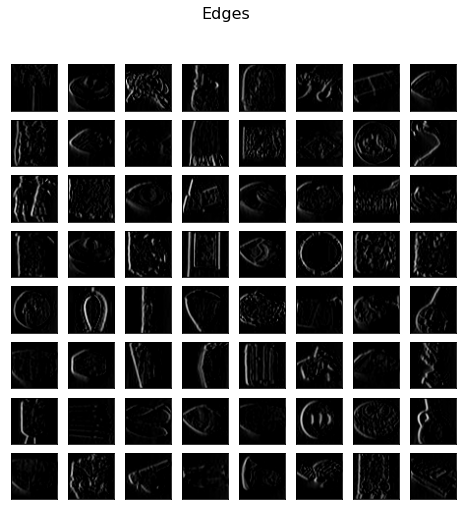

In [47]:
show.show_images_from_np_array(prediction, "Edges")